In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Используя данные по заболеваемости диабетом
(https://www.kaggle.com/datasets/gyanashish/healthcare-diabetes) определите
какой процент пациентов болен этим заболеванием. В качестве ответа
введите долю людей больных диабетом с округлением до 2-х знаков после
запятой.

In [4]:
df = pd.read_csv("./data/health care diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df["Outcome"].value_counts(normalize=True).round(2)

Outcome
0    0.65
1    0.35
Name: proportion, dtype: float64

Выполните анализ и предобработку данных. Рассчитайте разность по модулю между средними значением кровяного давления для больных диабетом и здоровых пациентов. 

Ответ необходимо ввести без размерности и с округлением до сотых.

In [13]:
pressure_mean = df.groupby("Outcome")["BloodPressure"].mean()
pressure_mean_delta = np.abs(pressure_mean[0] - pressure_mean[1])
pressure_mean_delta = np.round(pressure_mean_delta, 2)
print(pressure_mean_delta)

2.64


Какие признаки, скорее всего, будут информативными исходя из проведенного анализа? Есть ли проблема мультиколлинеарности признаков? В качестве ответа введите названия нецелевых признаков (в алфавитном порядке) между  которыми наибольший коэффициент корреляции. 

Название признаков записываете как в исходном датасете в одной строке через пробел.

<Axes: >

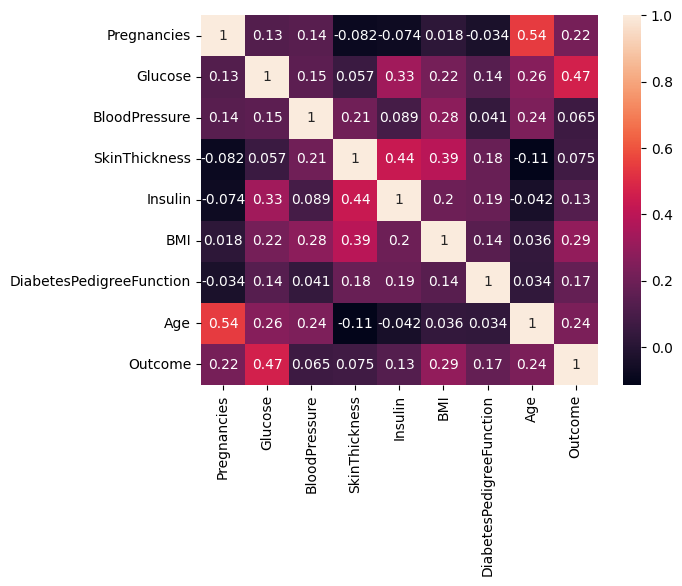

In [15]:
sns.heatmap(df.corr(), annot=True)

Используя взаимную информацию оцените значимость признаков. Рассчитать взаимную информацию можно с помощью функции sklearn (https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.mutual_info_classif.html).

В качестве ответа введите название признака для которого этот показатель максимален.

In [17]:
from sklearn.feature_selection import mutual_info_classif

In [24]:
info_weight = mutual_info_classif(X:=df.drop("Outcome", axis=1), y:=df["Outcome"])
top_info_weight = np.argmax(info_weight)
answer = X.columns.to_list()[top_info_weight]
print(answer)

Glucose


Болен или не болен диабетом? 

Постройте модель knn для предсказания того болен человек диабетом или нет. Для этого используйте данные по заболеваемости диабетом (https://www.kaggle.com/datasets/gyanashish/healthcare-diabetes). 

При обучении модели разделите данные на обучающую и тестовую части в соотношении 80:20. Зафиксируйте random_state равным 42 (при разделении данных и кросс-валидации). В кросс-валидации используйте перемешивание объектов (параметр shuffle) и KFold (https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.KFold.html). 

Подбор гиперпараметров реализуйте с помощью GridSearchCV (рассматриваете число ближайших соседей от 3 до 20 (включительно) и метрики 'minkowski', 'euclidean', 'cosine'). 

В качестве ответа введите подобранные гиперпараметры (сначала метрику, а потом через пробел оптимальное число ближайших соседей).

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [71]:
random_state = 42
param_grid = {
    "n_neighbors": [i for i in range(3, 21)],
    "metric": ["euclidean", "cosine", "minkowski"],
}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state,
)

kfold_folds = KFold(random_state=random_state, shuffle=True)
kfold_folds.get_n_splits(X_train, y_train)

clf = KNeighborsClassifier()

gs_cv = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=kfold_folds,
)

gs_cv.fit(X_train, y_train)
print(gs_cv.best_params_, gs_cv.best_score_)


{'metric': 'euclidean', 'n_neighbors': 11} 0.7605757696921231


In [37]:
metric = gs_cv.best_params_["metric"]
n_neighbors = gs_cv.best_params_["n_neighbors"]

Обучите модель с подобранными в предыдущем задании оптимальными гиперпараметрами. Оцените качество обученной модели на тестовой части выборки (тестовая часть составляет 33%) по метрикам accuracy, precision, recall, f1-score и AUC ROC. Первые четыре метрики (с макроусреднением) рассчитывайте с помощью функции classification_report.

Зафиксируйте random_state равным 42 (при разделении данных). 

В качестве ответа введите в одной строке через пробел полученные значения метрик (с округлением до сотых) для тестовой выборки в следующем порядке: accuracy, precision, recall, f1-score и AUC ROC.

Ответ в формате: 0.00 0.00 0.00 0.00

In [38]:
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state
)

knn_clf = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors, n_jobs=-1)

knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
y_pred_proba = knn_clf.predict_proba(X_test)[:, 1]

report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report["accuracy"]
precision = report["1"]["precision"]
recall = report["1"]["recall"]
f1 = report["1"]["f1-score"]
roc_auc = np.round(roc_auc_score(y_test, y_pred_proba), 2)

# print(classification_report(y_test, y_pred))
# print(np.round(roc_auc_score(y_test, y_pred_proba), 2))

# Вывод метрик с округлением до сотых
print(
    f"{np.round(accuracy, 2)} {np.round(precision, 2)} {np.round(recall, 2)} {np.round(f1, 2)} {np.round(roc_auc, 2)}"
)

0.72 0.62 0.48 0.54 0.76


Проанализируйте как меняется качество модели при увеличении числа ближайших соседей. Начните с 2 ближайших соседей (рассмотрите значения до 15 включительно). Постройте графики изменения метрики precision с макроусреднением при увеличении числа учитываемых соседей. 

Укажите оптимальное число ближайших соседей (по метрике precision с макроусреднением)на тестовой части выборки. Тестовая часть данных составляет 33% от исходной выборки. При разделении данных зафиксируйте random_state равным 42.

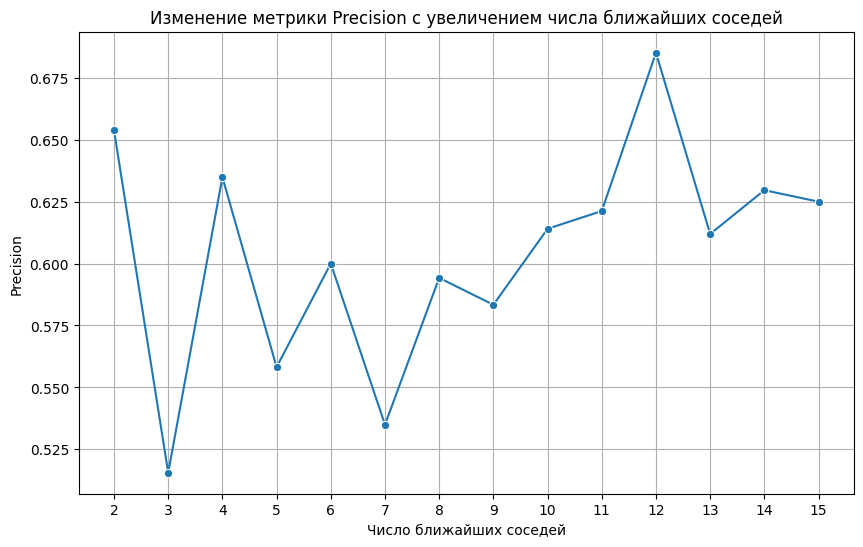

Оптимальное число ближайших соседей (по метрике Precision): 12


In [60]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state
)

# Определяем количество соседей
n_neighbors = [i for i in range(2, 16)]
precision_metric = []

# Цикл для обучения модели и расчета точности (precision)
for i in n_neighbors:
    knn_clf = KNeighborsClassifier(metric=metric, n_neighbors=i, n_jobs=-1)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_metric.append(report['1']['precision'])  # Добавление значения precision в список

# Построение графика изменения метрики precision
plt.figure(figsize=(10, 6))
sns.lineplot(x=n_neighbors, y=precision_metric, marker='o')
plt.title('Изменение метрики Precision с увеличением числа ближайших соседей')
plt.xlabel('Число ближайших соседей')
plt.ylabel('Precision')
plt.xticks(n_neighbors)  # Подписи для всех соседей
plt.grid()
plt.show()

# Определение оптимального числа соседей
optimal_neighbors = n_neighbors[precision_metric.index(max(precision_metric))]
print(f"Оптимальное число ближайших соседей (по метрике Precision): {optimal_neighbors}")

Проанализируйте как меняется качество модели при увеличении числа ближайших соседей. Начните с 2 ближайших соседей (рассмотрите значения до 15 включительно). Постройте графики изменения метрики precision с макроусреднением при увеличении числа учитываемых соседей. 

Укажите оптимальное число ближайших соседей (по метрике f1-score с макроусреднением)на тестовой части выборки. Тестовая часть данных составляет 33% от исходной выборки. При разделении данных зафиксируйте random_state равным 42.

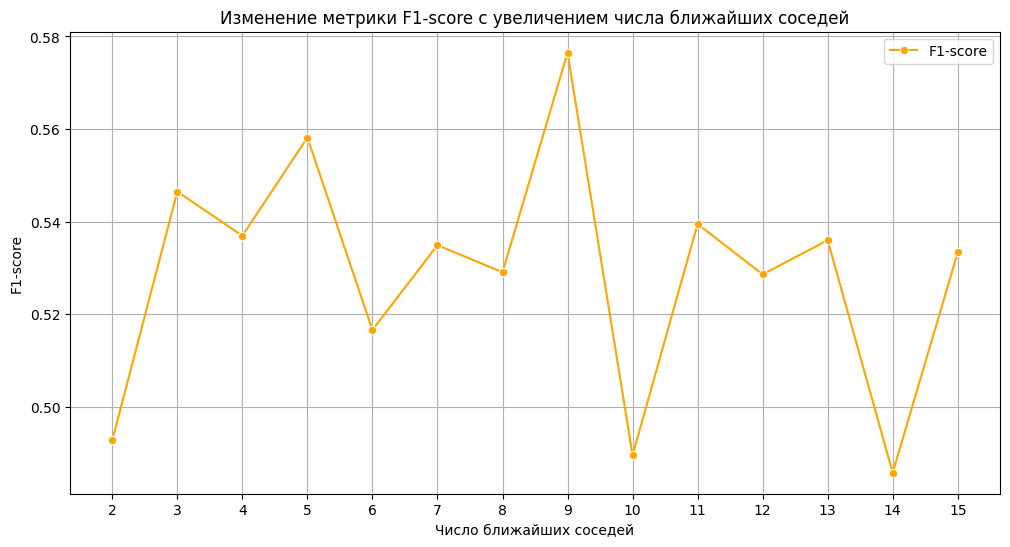

Оптимальное число ближайших соседей (по метрике F1-score): 9


In [62]:
# Определяем количество соседей
n_neighbors = [i for i in range(2, 16)]
precision_metric = []
f1_metric = []

# Цикл для обучения модели и расчета метрик
for i in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_metric.append(report['1']['precision'])  # Precision для класса "1"
    f1_metric.append(report['1']['f1-score'])  # F1-score для класса "1"


# Построение графика изменения метрики f1-score
plt.figure(figsize=(12, 6))
sns.lineplot(x=n_neighbors, y=f1_metric, marker='o', color='orange', label='F1-score')
plt.title('Изменение метрики F1-score с увеличением числа ближайших соседей')
plt.xlabel('Число ближайших соседей')
plt.ylabel('F1-score')
plt.xticks(n_neighbors)  # Подписи для всех соседей
plt.grid()
plt.legend()
plt.show()

# Определение оптимального числа соседей по метрике f1-score
optimal_neighbors = n_neighbors[f1_metric.index(max(f1_metric))]
print(f"Оптимальное число ближайших соседей (по метрике F1-score): {optimal_neighbors}")

Проанализируйте как меняется качество модели при увеличении числа ближайших соседей. Начните с 2 ближайших соседей (рассмотрите значения до 15 включительно). Постройте графики изменения метрики precision с макроусреднением при увеличении числа учитываемых соседей. 

Укажите оптимальное число ближайших соседей (по метрике recall с макроусреднением)на тестовой части выборки. Тестовая часть данных составляет 33% от исходной выборки. При разделении данных зафиксируйте random_state равным 42.

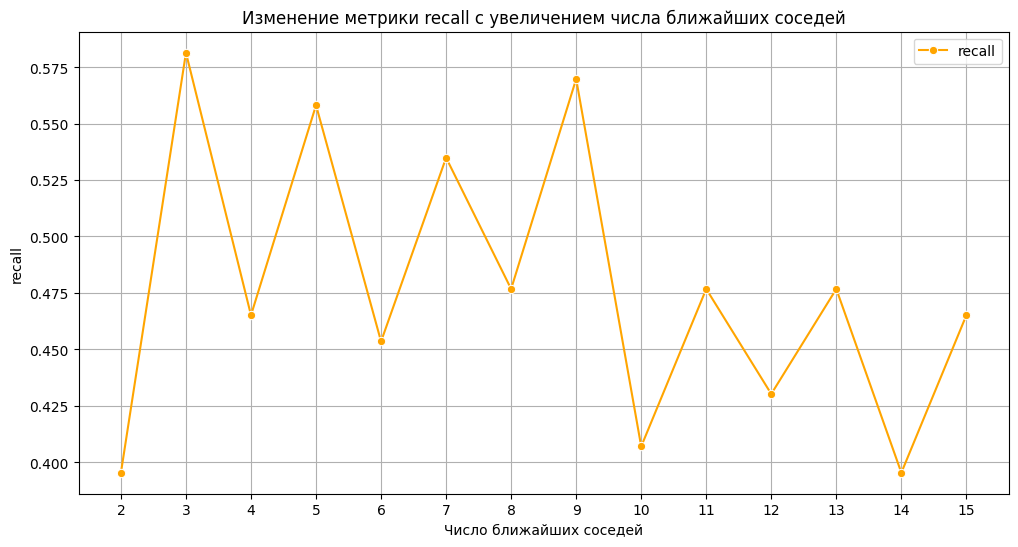

Оптимальное число ближайших соседей (по метрике recall): 3


In [66]:
# Определяем количество соседей
n_neighbors = [i for i in range(2, 16)]
precision_metric = []
recall = []

# Цикл для обучения модели и расчета метрик
for i in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_metric.append(report['1']['precision'])  # Precision для класса "1"
    recall.append(report['1']['recall'])  # recall для класса "1"


# Построение графика изменения метрики recall
plt.figure(figsize=(12, 6))
sns.lineplot(x=n_neighbors, y=recall, marker='o', color='orange', label='recall')
plt.title('Изменение метрики recall с увеличением числа ближайших соседей')
plt.xlabel('Число ближайших соседей')
plt.ylabel('recall')
plt.xticks(n_neighbors)  # Подписи для всех соседей
plt.grid()
plt.legend()
plt.show()

# Определение оптимального числа соседей по метрике recall
optimal_neighbors = n_neighbors[recall.index(max(recall))]
print(f"Оптимальное число ближайших соседей (по метрике recall): {optimal_neighbors}")

Проанализируйте как меняется качество модели при увеличении числа ближайших соседей. Начните с 2 ближайших соседей (рассмотрите значения до 15 включительно). Постройте графики изменения метрики precision с макроусреднением при увеличении числа учитываемых соседей. 

Укажите оптимальное число ближайших соседей (по метрике AUC ROC)на тестовой части выборки. Тестовая часть данных составляет 33% от исходной выборки. При разделении данных зафиксируйте random_state равным 42.

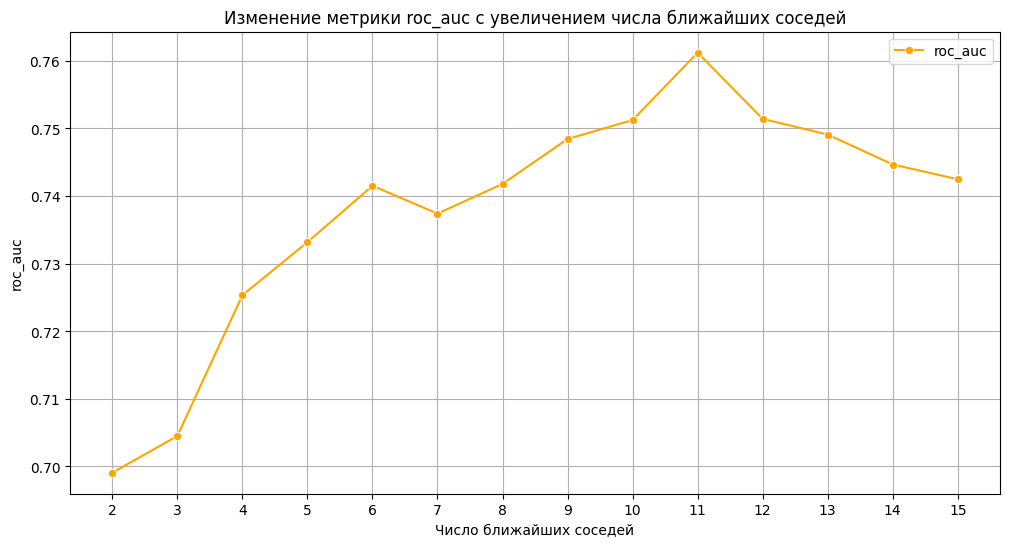

Оптимальное число ближайших соседей (по метрике roc_auc): 11


In [67]:
# Определяем количество соседей
n_neighbors = [i for i in range(2, 16)]
precision_metric = []
roc_auc = []

# Цикл для обучения модели и расчета метрик
for i in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    y_pred_proba = knn_clf.predict_proba(X_test)[:, 1]
    roc_auc_metric = roc_auc_score(y_test, y_pred_proba)
    
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_metric.append(report['1']['precision'])  # Precision для класса "1"
    roc_auc.append(roc_auc_metric)  # roc_auc для класса "1"


# Построение графика изменения метрики roc_auc
plt.figure(figsize=(12, 6))
sns.lineplot(x=n_neighbors, y=roc_auc, marker='o', color='orange', label='roc_auc')
plt.title('Изменение метрики roc_auc с увеличением числа ближайших соседей')
plt.xlabel('Число ближайших соседей')
plt.ylabel('roc_auc')
plt.xticks(n_neighbors)  # Подписи для всех соседей
plt.grid()
plt.legend()
plt.show()

# Определение оптимального числа соседей по метрике roc_auc
optimal_neighbors = n_neighbors[roc_auc.index(max(roc_auc))]
print(f"Оптимальное число ближайших соседей (по метрике roc_auc): {optimal_neighbors}")